### 1. Write Steps Involved in PCA.

##### STEP 1: STANDARDIZATION
The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (for example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

#####  STEP 2: COVARIANCE MATRIX COMPUTATION
The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.

###### STEP 3: COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS
Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data. 

What you first need to know about eigenvectors and eigenvalues is that they always come in pairs, so that every eigenvector has an eigenvalue. Also, their number is equal to the number of dimensions of the data. For example, for a 3-dimensional data set, there are 3 variables, therefore there are 3 eigenvectors with 3 corresponding eigenvalues.

It is eigenvectors and eigenvalues who are behind all the magic of principal components because the eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance (most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

##### STEP 4: CREATE A FEATURE VECTOR
As we saw in the previous step, computing the eigenvectors and ordering them by their eigenvalues in descending order, allow us to find the principal components in order of significance. In this step, what we do is, to choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector.

So, the feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep. This makes it the first step towards dimensionality reduction, because if we choose to keep only p eigenvectors (components) out of n, the final data set will have only p dimensions.

###### STEP 5: RECAST THE DATA ALONG THE PRINCIPAL COMPONENTS AXES
In the previous steps, apart from standardization, you do not make any changes on the data, you just select the principal components and form the feature vector, but the input data set remains always in terms of the original axes (i.e, in terms of the initial variables).

In this step, which is the last one, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis). This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.

### 2. Perform dimensionality reduction using PCA on the US Arrests dataset (enclosed herewith). What variance can be explained by PC1 & PC2?


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("USArrests.csv")

In [5]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [14]:
df_sc=sc.fit_transform(df)

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA()

In [24]:
df_pca=pca.fit_transform(df_sc)

In [29]:
component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
pd.DataFrame(df_pca,columns=component_names)

,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996
5,1.514563,-0.987555,1.095007,0.001465
6,-1.358647,-1.088928,-0.643258,-0.118469
7,0.047709,-0.325359,-0.718633,-0.881978
8,3.013042,0.039229,-0.576829,-0.096285
9,1.639283,1.278942,-0.342460,1.076797


In [31]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [32]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [35]:
evc = np.cumsum(pca.explained_variance_)
print(evc)

[2.53085875 3.5408232  3.90466318 4.08163265]


<function matplotlib.pyplot.show(close=None, block=None)>

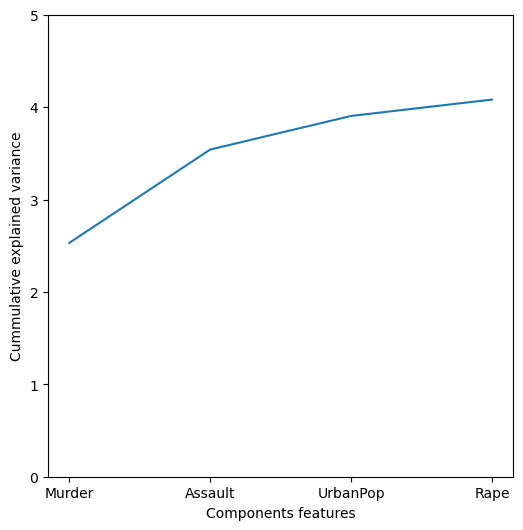

In [50]:
features = ['Murder', 'Assault', 'UrbanPop', 'Rape']
plt.figure(figsize=(6,6))
sns.lineplot(x=features, y=evc)
plt.xlabel("Components features")
plt.ylabel("Cummulative explained variance")
plt.ylim(0,5)
plt.show

### 3. Why Dimension Reduction is an Important  Concept in Data Science?


- It reduces the time and storage space required.
- It helps Remove multi-collinearity which improves the interpretation of the parameters of the machine learning model.
- It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D.
- It avoids the curse of dimensionality.
- It removes irrelevant features from the data, Because having irrelevant features in the data can decrease the accuracy of the models and make your model learn based on irrelevant features.

### 4. Explore Other Dimension Reduction Methods other than PCA. Explain it.


Among machine learning algorithms, there are many basic linear dimension reduction methods including PCA, ICA, linear discriminant analysis (LDA), LFA, and LPP, but most of them are based on the projection of data, which makes data from the dimension reduction difficult to interpret. Now there are two widely used dimension reduction methods, PCA and LDA, which will be introduced in this section.

###### Linear Discriminant Analysis

LDA, also known as Fisher linear discriminant, is a common way of dimension reduction in machine learning. Unlike PCA, it needs to enter known labels, which means it needs supervised conditions. The concept is to find a low-dimensional space in a high-dimensional space, which can make the mean (center points) distance of two or more types of data be the farthest and the intraclasses variance of each type to be as small as possible. As shown in the figure Fig. 2.9, μ represents the center of the data classes, while the size of the red and blue circles represents the size of variance. It can be seen that by projecting the data onto the diagonal on the left, the centers of red and blue datasets can be separated.

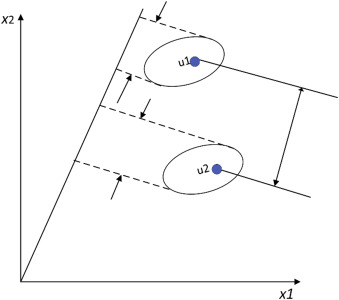